<a href="https://colab.research.google.com/github/luiscunhacsc/finance_python/blob/main/21_MPT_CAPM_EfficientFrontier_Demo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demonstrating Modern Portfolio Theory (MPT) and Capital Asset Pricing Model (CAPM)

In this notebook, we will use real stock data from 20 companies across various sectors of the U.S. economy to demonstrate the benefits of diversification using Modern Portfolio Theory (MPT) and the Capital Asset Pricing Model (CAPM).

### Selected Stocks and Sectors

We have chosen the following 20 stocks, each representing a different sector:

1. **Apple Inc. (AAPL)** - Technology
2. **Microsoft Corp. (MSFT)** - Technology
3. **Alphabet Inc. (GOOGL)** - Communication Services
4. **Amazon.com Inc. (AMZN)** - Consumer Discretionary
5. **Tesla Inc. (TSLA)** - Consumer Discretionary
6. **Johnson & Johnson (JNJ)** - Healthcare
7. **Pfizer Inc. (PFE)** - Healthcare
8. **JPMorgan Chase & Co. (JPM)** - Financials
9. **Bank of America Corp. (BAC)** - Financials
10. **Exxon Mobil Corp. (XOM)** - Energy
11. **Chevron Corp. (CVX)** - Energy
12. **Procter & Gamble Co. (PG)** - Consumer Staples
13. **Coca-Cola Co. (KO)** - Consumer Staples
14. **Walmart Inc. (WMT)** - Consumer Staples
15. **Nvidia Corp. (NVDA)** - Technology
16. **Intel Corp. (INTC)** - Technology
17. **Boeing Co. (BA)** - Industrials
18. **Caterpillar Inc. (CAT)** - Industrials
19. **Visa Inc. (V)** - Financials
20. **McDonald's Corp. (MCD)** - Consumer Discretionary

We will also use the S&P 500 index (^GSPC) as the market benchmark.


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of selected stocks and the S&P 500 index
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'JNJ', 'PFE', 'JPM', 'BAC',
    'XOM', 'CVX', 'PG', 'KO', 'WMT', 'NVDA', 'INTC', 'BA', 'CAT', 'V', 'MCD', '^GSPC'
]

# Download historical data
data = yf.download(tickers, start='2015-01-01', end='2024-06-01')['Adj Close']

# Display the first few rows of the data
data.head()


[*********************100%%**********************]  21 of 21 completed


Ticker,AAPL,AMZN,BA,BAC,CAT,CVX,GOOGL,INTC,JNJ,JPM,...,MCD,MSFT,NVDA,PFE,PG,TSLA,V,WMT,XOM,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,24.3740,15.4260,113.6572,14.7087,70.6200,75.0443,26.4471,27.8965,80.5544,48.0023,...,73.1772,40.2328,0.4832,20.3525,68.6772,14.6207,61.8941,23.4934,60.5359,2058.2000
2015-01-05,23.6873,15.1095,112.8701,14.2814,66.8922,72.0446,25.9432,27.5819,79.9918,46.5121,...,72.3690,39.8629,0.4751,20.2420,68.3507,14.0060,60.5279,23.4250,58.8795,2020.5800
2015-01-06,23.6895,14.7645,111.5406,13.8541,66.4618,72.0113,25.3030,27.0678,79.5987,45.3061,...,72.5024,39.2778,0.4607,20.4109,68.0393,14.0853,60.1379,23.6056,58.5665,2002.6100
2015-01-07,24.0217,14.9210,113.2724,13.9199,67.4918,71.9513,25.2285,27.6356,81.3560,45.3752,...,73.7657,39.7768,0.4595,20.6903,68.3962,14.0633,60.9436,24.2319,59.1599,2025.9000
2015-01-08,24.9447,15.0230,115.2753,14.2075,68.1835,73.5977,25.3164,28.1496,81.9956,46.3892,...,74.0404,40.9470,0.4767,21.1125,69.1784,14.0413,61.7610,24.7433,60.1447,2062.1399


In [ ]:
# Calculate daily returns
returns = data.pct_change().dropna()

# Display the first few rows of the returns
returns.head()


Ticker,AAPL,AMZN,BA,BAC,CAT,CVX,GOOGL,INTC,JNJ,JPM,...,MCD,MSFT,NVDA,PFE,PG,TSLA,V,WMT,XOM,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.0282,-0.0205,-0.0069,-0.0291,-0.0528,-0.0400,-0.0191,-0.0113,-0.0070,-0.0310,...,-0.0110,-0.0092,-0.0169,-0.0054,-0.0048,-0.0420,-0.0221,-0.0029,-0.0274,-0.0183
2015-01-06,0.0001,-0.0228,-0.0118,-0.0299,-0.0064,-0.0005,-0.0247,-0.0186,-0.0049,-0.0259,...,0.0018,-0.0147,-0.0303,0.0083,-0.0046,0.0057,-0.0064,0.0077,-0.0053,-0.0089
2015-01-07,0.0140,0.0106,0.0155,0.0047,0.0155,-0.0008,-0.0029,0.0210,0.0221,0.0015,...,0.0174,0.0127,-0.0026,0.0137,0.0052,-0.0016,0.0134,0.0265,0.0101,0.0116
2015-01-08,0.0384,0.0068,0.0177,0.0207,0.0102,0.0229,0.0035,0.0186,0.0079,0.0223,...,0.0037,0.0294,0.0376,0.0204,0.0114,-0.0016,0.0134,0.0211,0.0166,0.0179
2015-01-09,0.0011,-0.0117,-0.0020,-0.0179,-0.0119,-0.0199,-0.0122,0.0019,-0.0136,-0.0174,...,-0.0122,-0.0084,0.0040,0.0046,-0.0093,-0.0188,-0.0148,-0.0124,-0.0014,-0.0084


In [ ]:
# Calculate mean returns and covariance matrix (annualized)
mean_returns = returns.mean() * 252  # 252 trading days in a year
cov_matrix = returns.cov() * 252  # Annualize the covariance matrix

# Display the mean returns and covariance matrix
print("Mean Returns:")
print(mean_returns)

print("\nCovariance Matrix:")
print(cov_matrix)


Mean Returns:
Ticker
AAPL    0.2612
AMZN    0.3134
BA      0.1304
BAC     0.1554
CAT     0.2113
CVX     0.1276
GOOGL   0.2402
INTC    0.0676
JNJ     0.0804
JPM     0.1903
KO      0.0905
MCD     0.1549
MSFT    0.2861
NVDA    0.6935
PFE     0.0620
PG      0.1096
TSLA    0.4246
V       0.1881
WMT     0.1319
XOM     0.1093
^GSPC   0.1166
dtype: float64

Covariance Matrix:
Ticker   AAPL   AMZN     BA    BAC    CAT    CVX  GOOGL   INTC    JNJ    JPM  \
Ticker                                                                         
AAPL   0.0828 0.0533 0.0475 0.0381 0.0338 0.0294 0.0503 0.0507 0.0191 0.0343   
AMZN   0.0533 0.1085 0.0384 0.0315 0.0287 0.0200 0.0610 0.0451 0.0144 0.0265   
BA     0.0475 0.0384 0.1656 0.0682 0.0585 0.0605 0.0433 0.0546 0.0217 0.0628   
BAC    0.0381 0.0315 0.0682 0.0994 0.0575 0.0554 0.0370 0.0453 0.0216 0.0777   
CAT    0.0338 0.0287 0.0585 0.0575 0.0896 0.0515 0.0316 0.0406 0.0187 0.0496   
CVX    0.0294 0.0200 0.0605 0.0554 0.0515 0.0904 0.0286 0.0360 0.0199

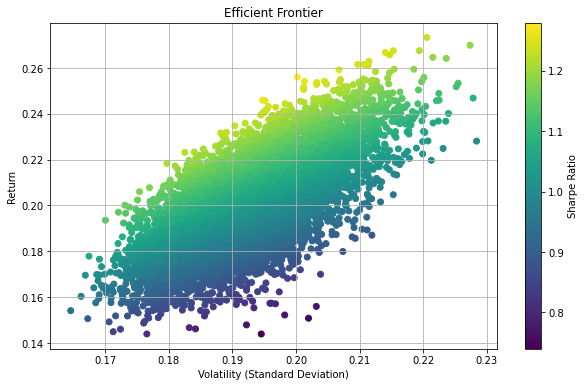

In [ ]:
from itertools import combinations
import scipy.optimize as sco

# Number of portfolio combinations to simulate
num_portfolios = 10000
results = np.zeros((4, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(len(tickers)-1)  # excluding S&P 500
    weights /= np.sum(weights)

    # Expected portfolio return and volatility (annualized)
    portfolio_return = np.sum(weights * mean_returns[:-1])
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix.iloc[:-1, :-1], weights)))

    results[0, i] = portfolio_return
    results[1, i] = portfolio_std_dev
    results[2, i] = results[0, i] / results[1, i]
    results[3, i] = np.dot(weights, np.dot(cov_matrix.iloc[:-1, :-1], weights))

# Plot the Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[1,:], results[0,:], c=results[2,:], marker='o', cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


In [ ]:
# Calculate the beta for each stock with respect to the S&P 500
market_returns = returns['^GSPC']
betas = {}

for stock in tickers[:-1]:
    covariance = np.cov(returns[stock], market_returns)[0][1]
    beta = covariance / market_returns.var()
    betas[stock] = beta

# Assuming a risk-free rate of 1%
risk_free_rate = 0.01
market_return = mean_returns['^GSPC']

# Calculate expected returns using CAPM
capm_expected_returns = {}
for stock in tickers[:-1]:
    expected_return = risk_free_rate + betas[stock] * (market_return - risk_free_rate)
    capm_expected_returns[stock] = expected_return

# Display CAPM expected returns and betas
print(f"CAPM Expected Returns:\n{capm_expected_returns}\n")
print(f"Betas:\n{betas}")


CAPM Expected Returns:
{'AAPL': 0.13810154453296236, 'MSFT': 0.13999623168248737, 'GOOGL': 0.13229450820354086, 'AMZN': 0.13109658917189076, 'TSLA': 0.16359636597831673, 'JNJ': 0.07025871613847723, 'PFE': 0.07690758360296943, 'JPM': 0.1288596060665409, 'BAC': 0.14265493719473082, 'XOM': 0.10371548636759559, 'CVX': 0.11834176574871301, 'PG': 0.0712439504697713, 'KO': 0.07511187613237785, 'WMT': 0.0650512159450408, 'NVDA': 0.19160555213335634, 'INTC': 0.13929279401334566, 'BA': 0.1561196823760487, 'CAT': 0.12266362528152527, 'V': 0.12406601716937565, 'MCD': 0.08475590573738234}

Betas:
{'AAPL': 1.2016355864011627, 'MSFT': 1.2194083893151855, 'GOOGL': 1.1471636319028957, 'AMZN': 1.135926748356284, 'TSLA': 1.4407855890757861, 'JNJ': 0.5652470309146697, 'PFE': 0.6276156446868703, 'JPM': 1.114943094214043, 'BAC': 1.244347941519028, 'XOM': 0.8790827919113752, 'CVX': 1.0162822133943368, 'PG': 0.5744888604159718, 'KO': 0.6107713044621197, 'WMT': 0.5163989270808084, 'NVDA': 1.703521178664013, 'I

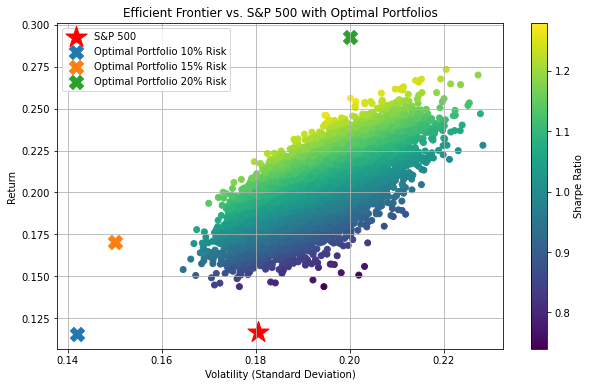


Optimal Portfolio 10% Risk:
   Ticker  Weight
8     BAC  0.1990
10    CVX  0.1849
18      V  0.1765
11     PG  0.1380
15   INTC  0.1228
14   NVDA  0.0851
19    MCD  0.0478
1    MSFT  0.0459
2   GOOGL  0.0000
16     BA  0.0000
0    AAPL  0.0000
17    CAT  0.0000
5     JNJ  0.0000
13    WMT  0.0000
4    TSLA  0.0000
9     XOM  0.0000
3    AMZN  0.0000
7     JPM  0.0000
12     KO  0.0000
6     PFE  0.0000

Optimal Portfolio 15% Risk:
   Ticker  Weight
18      V  0.1814
11     PG  0.1680
8     BAC  0.1526
10    CVX  0.1313
15   INTC  0.1299
1    MSFT  0.0704
13    WMT  0.0648
14   NVDA  0.0407
4    TSLA  0.0298
19    MCD  0.0225
16     BA  0.0086
5     JNJ  0.0000
7     JPM  0.0000
3    AMZN  0.0000
17    CAT  0.0000
9     XOM  0.0000
12     KO  0.0000
6     PFE  0.0000
2   GOOGL  0.0000
0    AAPL  0.0000

Optimal Portfolio 20% Risk:
   Ticker  Weight
13    WMT  0.2408
11     PG  0.2084
18      V  0.1830
15   INTC  0.1355
1    MSFT  0.0834
4    TSLA  0.0634
8     BAC  0.0436
16     BA  0.

In [ ]:
# Define portfolio statistics function
def portfolio_stats(weights, mean_returns, cov_matrix):
    portfolio_return = np.sum(weights * mean_returns)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_std_dev

# Optimization function
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return, portfolio_std_dev = portfolio_stats(weights, mean_returns, cov_matrix)
    return -(portfolio_return - risk_free_rate) / portfolio_std_dev

# Risk levels for optimized portfolios
risk_levels = [0.10, 0.15, 0.20]
optimal_portfolios = {}

bounds = tuple((0, 1) for _ in range(len(tickers) - 1))  # Exclude S&P 500 from bounds

for risk_level in risk_levels:
    def risk_constraint(weights):
        return portfolio_stats(weights, mean_returns[:-1], cov_matrix.iloc[:-1, :-1])[1] - risk_level

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                   {'type': 'eq', 'fun': risk_constraint})

    result = sco.minimize(negative_sharpe_ratio, len(tickers[:-1]) * [1./len(tickers[:-1])],
                          args=(mean_returns[:-1], cov_matrix.iloc[:-1, :-1], 0.01),
                          method='SLSQP', bounds=bounds, constraints=constraints)

    optimal_portfolios[risk_level] = result.x

# Calculate the S&P 500 performance for comparison
sp500_return = mean_returns['^GSPC']
sp500_volatility = np.sqrt(np.dot([1], np.dot(cov_matrix.loc['^GSPC', '^GSPC'], [1])))

# Plot the Efficient Frontier with Optimal Portfolios and S&P 500
plt.figure(figsize=(10, 6))
plt.scatter(results[1,:], results[0,:], c=results[2,:], marker='o', cmap='viridis')
plt.colorbar(label='Sharpe Ratio')

# Plot the S&P 500
plt.scatter(sp500_volatility, sp500_return, color='red', marker='*', s=500, label='S&P 500')

# Plot Optimal Portfolios
for risk_level, weights in optimal_portfolios.items():
    p_return, p_volatility = portfolio_stats(weights, mean_returns[:-1], cov_matrix.iloc[:-1, :-1])
    plt.scatter(p_volatility, p_return, marker='X', s=200, label=f'Optimal Portfolio {int(risk_level*100)}% Risk')

plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier vs. S&P 500 with Optimal Portfolios')
plt.legend()
plt.grid(True)
plt.show()

# Display optimal portfolios' holdings
for risk_level, weights in optimal_portfolios.items():
    print(f"\nOptimal Portfolio {int(risk_level*100)}% Risk:")
    portfolio_df = pd.DataFrame({
        'Ticker': tickers[:-1],  # Exclude S&P 500
        'Weight': weights
    })
    portfolio_df = portfolio_df.sort_values(by='Weight', ascending=False)
    print(portfolio_df)
